In [1]:
import numpy as np
import csv, os
from torch.utils.data import DataLoader
from dgl.data.utils import split_dataset
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats

from src_chung.model import reactionMPNN, training, inference
from src_chung.dataset import GraphDataset
from src_chung.util import collate_reaction_graphs

/home/phuocchung123/anaconda3/envs/GIN_korea/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
data = GraphDataset('./data_chung/data_test.npz')
# train_loader = DataLoader(
#         dataset=data,
#         batch_size=32,
#         shuffle=True,
#         collate_fn=collate_reaction_graphs,
#         drop_last=True,
#     )

In [19]:
a=[np.argmax(i) for i in data.y]


In [20]:
from collections import defaultdict

element_count = defaultdict(int)

for element in a:
    element_count[element] += 1

print(element_count)
print(len(element_count.keys()))

defaultdict(<class 'int'>, {35: 800, 41: 800, 13: 800, 4: 800, 12: 800, 26: 800, 24: 800, 27: 800, 0: 800, 2: 800, 22: 800, 7: 800, 23: 800, 32: 800, 14: 800, 19: 800, 25: 800, 36: 800, 37: 800, 17: 800, 6: 800, 1: 800, 20: 800, 40: 800, 49: 800, 3: 800, 28: 800, 33: 800, 34: 800, 10: 800, 15: 800, 48: 800, 38: 800, 5: 800, 16: 800, 30: 800, 18: 800, 39: 800, 11: 800, 44: 800, 8: 800, 31: 800, 9: 800, 45: 800, 46: 800, 47: 800, 43: 800, 21: 800, 42: 800, 29: 800})
50


In [31]:
for batch in train_loader:
    a=batch[-1]
    break

In [1]:
import pandas as pd
data=pd.read_csv('./data_chung/schneider50k.tsv',sep='\t',index_col=0)
data.head()

,original_rxn,rxn_class,source,rxn,split
0,[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...,6.1.5,US06887874,C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH...,test
1,O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...,7.1.1,US07056926,CCOC(C)=O.Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccccc...,test
2,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...,1.8.5,US08492378,COc1ccc(-c2coc3ccc(-c4nnc(S)o4)cc23)cc1.COc1cc...,test
3,Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....,2.2.3,US08592454,CCS(=O)(=O)Cl.CN(C(=O)N(C)[C@@H]1CN(C(=O)C2CCN...,train
4,[CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...,1.3.7,US06716851,COc1ccc(OC)c(N)c1.Cc1cc(Cl)nc(-c2ccccn2)n1>>CO...,test


In [8]:
import numpy as np
for i in data.rxn.values:
    react,product=i.split('>>')
    reat_lst=react.split('.')
    pro_lst=product.split('.')
    # idx_longest_react=np.argmax([len(r) for r in reat_lst])
    # idx_longest_product=np.argmax([len(p) for p in pro_lst])
    for i in 
    new_react=reat_lst[idx_longest_react]+'>>'+pro_lst[idx_longest_product]
    print(new_react)
    break




CS(=O)(=O)N1CCN(Cc2ccccc2)CC1>>CS(=O)(=O)N1CCNCC1


In [38]:
lst=[]
for idx,i in enumerate(data.rxn.values):
    react,product=i.split('>>')
    reat_lst=react.split('.')
    pro_lst=product.split('.')
    len_pro_lst=[len(p) for p in pro_lst]
    if len(len_pro_lst) > 1:
        dem=0
        for j in len_pro_lst:
            if j>20:
                dem+=1
        if dem>1:
            lst.append(i)

In [39]:
len(lst)

88

In [15]:
def new_smi_react(smi):
    react,product=smi.split('>>')
    reat_lst=react.split('.')
    pro_lst=product.split('.')
    idx_longest_react=np.argmax([len(r) for r in reat_lst])
    idx_longest_product=np.argmax([len(p) for p in pro_lst])
    new_react=reat_lst[idx_longest_react]+'>>'+pro_lst[idx_longest_product]
    return new_react
data['new_rxn']=data['rxn'].apply(new_smi_react)

In [16]:
data.head(4)

,original_rxn,rxn_class,source,rxn,split,new_rxn
0,[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...,6.1.5,US06887874,C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH...,test,CS(=O)(=O)N1CCN(Cc2ccccc2)CC1>>CS(=O)(=O)N1CCNCC1
1,O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...,7.1.1,US07056926,CCOC(C)=O.Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccccc...,test,Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccccc1>>Cc1cc(N...
2,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...,1.8.5,US08492378,COc1ccc(-c2coc3ccc(-c4nnc(S)o4)cc23)cc1.COc1cc...,test,COc1ccc(-c2coc3ccc(-c4nnc(S)o4)cc23)cc1>>COc1c...
3,Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....,2.2.3,US08592454,CCS(=O)(=O)Cl.CN(C(=O)N(C)[C@@H]1CN(C(=O)C2CCN...,train,CN(C(=O)N(C)[C@@H]1CN(C(=O)C2CCNCC2)C[C@H]1c1c...


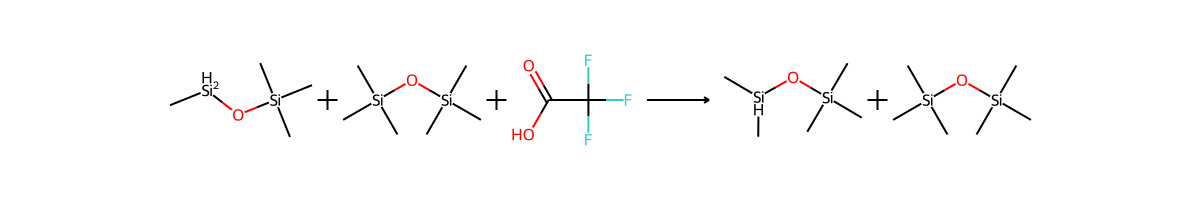

In [41]:
from rdkit.Chem import AllChem, Draw
rxn=AllChem.ReactionFromSmarts(lst[1],useSmiles=True)
Draw.ReactionToImage(rxn)

/home/phuocchung123/anaconda3/envs/GIN_korea/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/phuocchung123/anaconda3/envs/GIN_korea/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


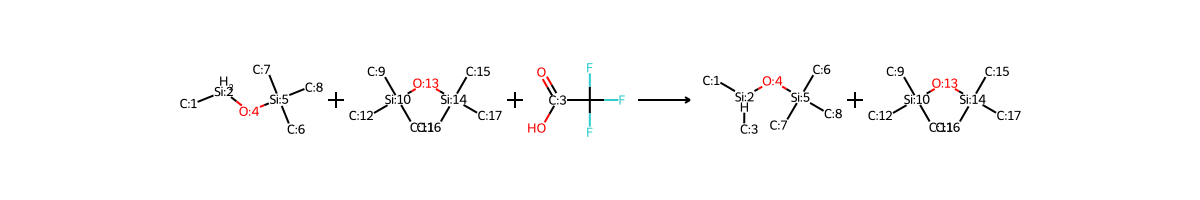

In [42]:
from rxnmapper import RXNMapper
rxnmapper = RXNMapper()
# provide SMILES of reactants and products separated by >>
example_reaction = lst[1]
res = rxnmapper.get_attention_guided_atom_maps([example_reaction])
react1=res[0]['mapped_rxn']
rxn=AllChem.ReactionFromSmarts(react1,useSmiles=True)
Draw.ReactionToImage(rxn)